In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\preet\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Importing our Dataset

df = pd.read_csv('train.csv')

## Step: 1  Ask the Questions from Data
* How many rows are there in the dataset?
* How many columns are there in the dataset?

In [3]:
df.shape

(891, 12)

* What are the data types of the columns in the dataset? (numeric, categorical, datetime, text, etc.)
* Do we have any columns with missing values? If so, how many missing values are there in each column?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* What does each column represent or describe in the dataset? (e.g., Passenger ID, Age, Sex, Fare, etc.)


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
## Getting Total Missing Values

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### For Handling missing values we can do two things
* drop/remove the rows with missing values. if there are alot missing values in any column then drop that columns too.
* or impute the missing values

In [9]:
# there are alot missing values in "Cabin" column for now we are droping this columns
df.drop(columns=['Cabin'], inplace=True)

In [10]:
# inputting missing values for age using mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

#### Now there arre only 2 missing values in Embarked Column

In [12]:
# there are only two missing values in Embarked Column we can drop these rows. but by dropping these values we lost other information in that row.
# But we will fill these values with most common/repeatative values

# df['Embarked'].mode()[0]

#  --- 'S' --- is the most common

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [13]:
# isna also used to find missing values

df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### So we deal with all missing values, now there is no any missing value in our column

In [14]:
# checking for sibSp and parch columns
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

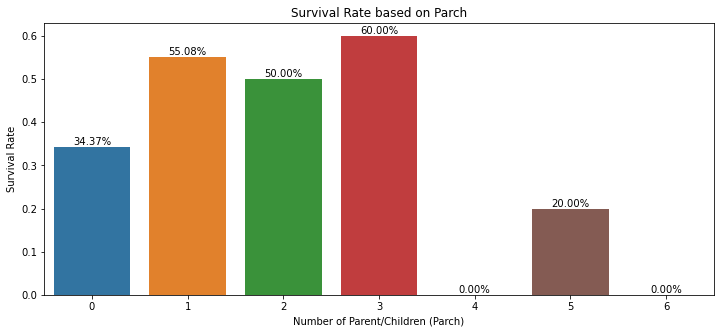

In [15]:
# plt.subplot(1, 2, 2)
# sns.countplot(x='Parch', hue='Survived', data=df)
# plt.xlabel('Number of Parents/Children (Parch)')
# plt.ylabel('Count')
# plt.title('Survival Count based on Parch')

# plt.tight_layout()
# plt.show()

parch_survival_rate = df.groupby('Parch')['Survived'].mean().reset_index()

plt.figure(figsize=(12, 5))

sns.barplot(x='Parch', y='Survived', data=parch_survival_rate)
plt.xlabel('Number of Parent/Children (Parch)')
plt.ylabel('Survival Rate')
plt.title('Survival Rate based on Parch')

# Annotate the bars with percentage values
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


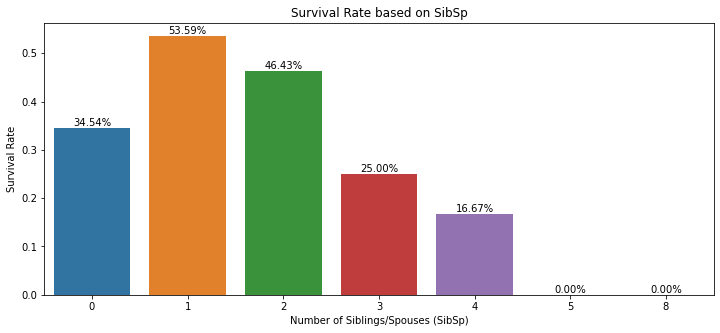

In [17]:
sibsp_survival_rate = df.groupby('SibSp')['Survived'].mean().reset_index()

plt.figure(figsize=(12, 5))

sns.barplot(x='SibSp', y='Survived', data=sibsp_survival_rate)
plt.xlabel('Number of Siblings/Spouses (SibSp)')
plt.ylabel('Survival Rate')
plt.title('Survival Rate based on SibSp')

# Annotate the bars with percentage values
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [19]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
# I think we should also check the uniqueness in passenger ID
df['PassengerId'].nunique()

# see, we have total 891 rows and passenger id just showing 256 unique numbers
# there are negative numbers in passengerID, and ID should not be neg.


891

In [21]:
# just gona drop passengerID column for now
df.drop('PassengerId', axis=1, inplace=True)

In [22]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


C:\Users\preet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

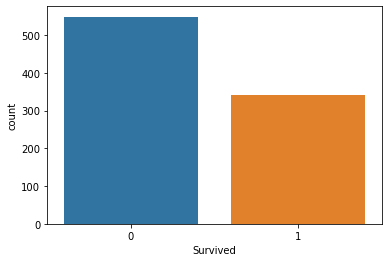

In [23]:
# univariate Aanalysis

# Survived  --> to see the visualization of Survived / non survived

sns.countplot(df['Survived'])

C:\Users\preet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

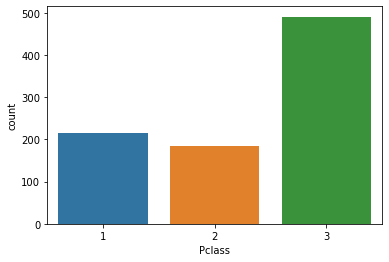

In [24]:
# Pclass

sns.countplot(df['Pclass'])

In [25]:
df.groupby('Pclass')['Survived'].mean().reset_index()

# class one have high survived ratiob

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [26]:
# extracting titles from Name column
df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [27]:
#  featrue engineering 
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,Rev
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,Mr


In [28]:
!pip install wordcloud

In [29]:
# from wordcloud import WordCloud
# # getting unique titles
# df['Title'].unique()  # these are all the titles

# # I just want to create a word cloud of these titles

# #(width=800, height=400, background_color='white').generate_from_frequencies(df['Title'].value_counts())

# # plotting word cloud

# plt.figure(figsize=(15,8))
# plt.imshow(WordCloud(width=800, height=400, background_color='white', font_path='Mistral.ttf').generate_from_frequencies(df['Title'].value_counts()), interpolation='bilinear')
# plt.axis("off")
# plt.title("Most Common Titles in Titanic Dataset")
# plt.show()

In [30]:
print(df['Pclass'].value_counts() / 891 * 100)

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


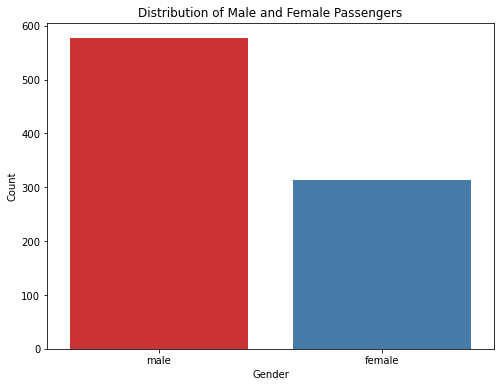

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sex', palette='Set1')
plt.title('Distribution of Male and Female Passengers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

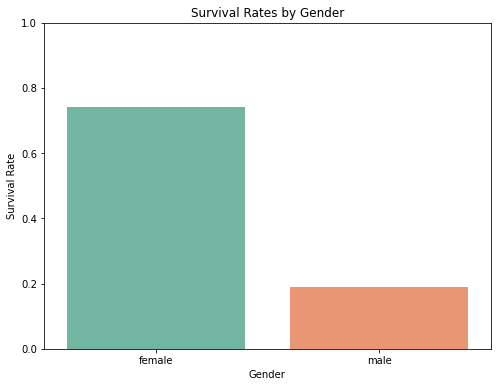

In [32]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df.groupby('Sex')['Survived'].mean().reset_index(), x='Sex', y='Survived', palette='Set2')
plt.title('Survival Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()

In [33]:
# male are greater in count but servival rate of female is higher

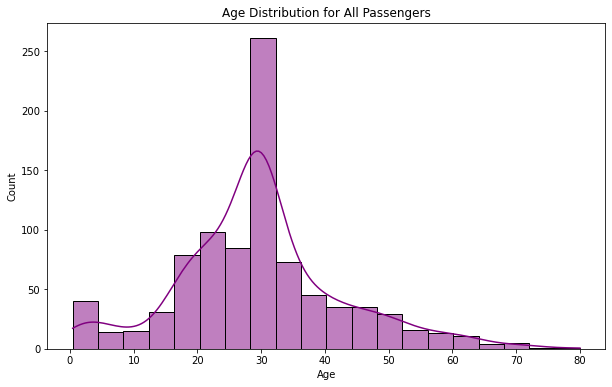

In [34]:
# Create a histogram to visualize the age distribution for all passengers
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True, color='purple')
plt.title('Age Distribution for All Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [35]:
print(df['SibSp'].value_counts()/891 * 100)

0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: SibSp, dtype: float64


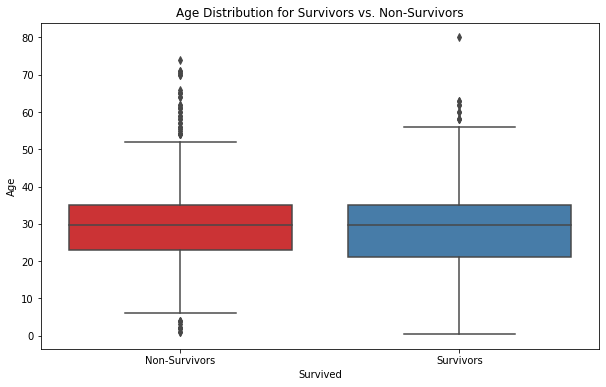

In [36]:
# Create a boxplot to visualize age distributions for survivors and non-survivors
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Survived', y='Age', palette='Set1')
plt.title('Age Distribution for Survivors vs. Non-Survivors')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([0, 1], ['Non-Survivors', 'Survivors'])
plt.show()

In [37]:
# for removing outliers we use basic interquartile technique IQR

q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3-q1

minimum = q1 - 1.5 * iqr
maximum = q3 + 1.5 * iqr

age_with_no_outlier = df[(df['Age'] >= minimum) & (df['Age'] <= maximum)]

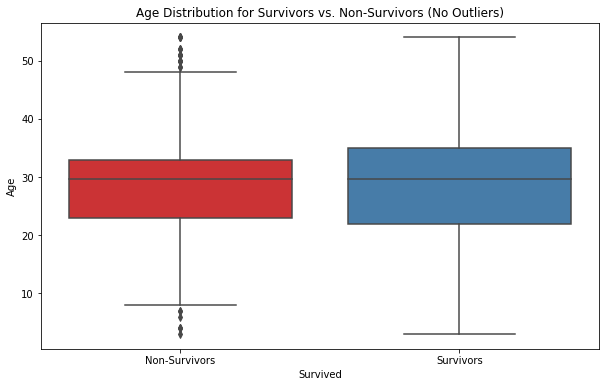

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=age_with_no_outlier, x='Survived', y='Age', palette='Set1')
plt.title('Age Distribution for Survivors vs. Non-Survivors (No Outliers)')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([0, 1], ['Non-Survivors', 'Survivors'])
plt.show()

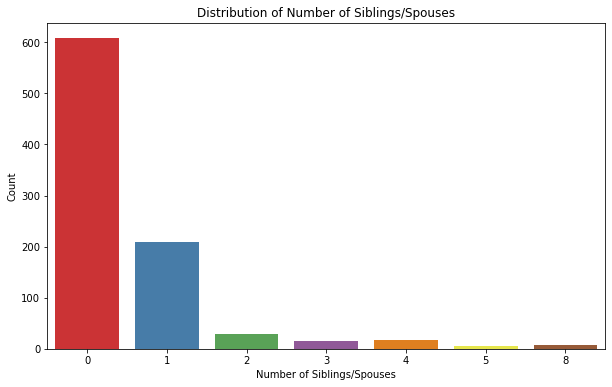

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='SibSp', palette='Set1')
plt.title('Distribution of Number of Siblings/Spouses')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Count')
plt.show()

In [40]:
survival_rates = df.groupby('SibSp')['Survived'].mean().reset_index()
survival_rates

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


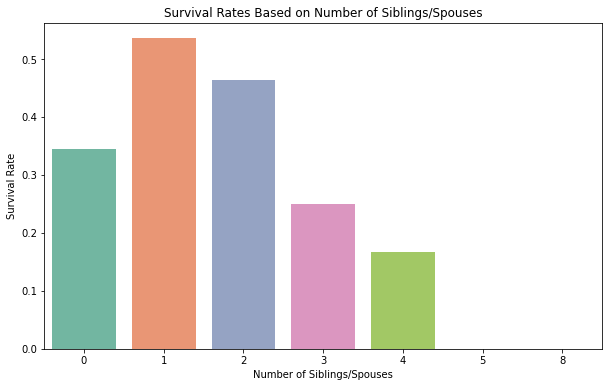

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(data=survival_rates, x='SibSp', y='Survived', palette='Set2')
plt.title('Survival Rates Based on Number of Siblings/Spouses')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Survival Rate')
plt.show()

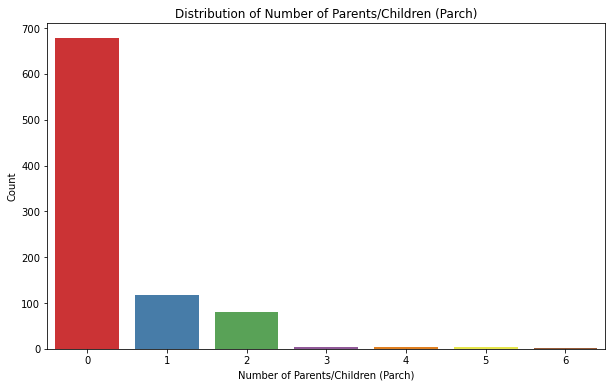

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Parch', palette='Set1')
plt.title('Distribution of Number of Parents/Children (Parch)')
plt.xlabel('Number of Parents/Children (Parch)')
plt.ylabel('Count')
plt.show()


In [43]:
survival_rates = df.groupby('Parch')['Survived'].mean().reset_index()
survival_rates

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


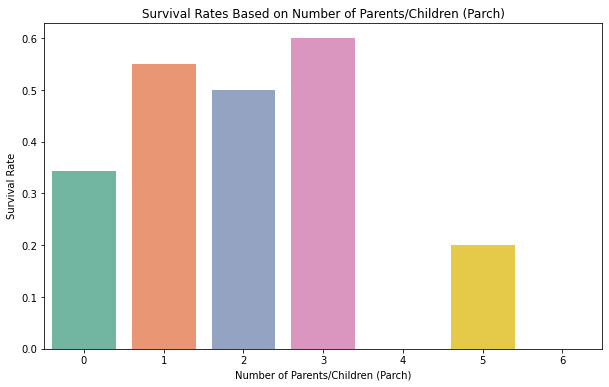

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(data=survival_rates, x='Parch', y='Survived', palette='Set2')
plt.title('Survival Rates Based on Number of Parents/Children (Parch)')
plt.xlabel('Number of Parents/Children (Parch)')
plt.ylabel('Survival Rate')
plt.show()


In [45]:
# tickets
unique_tickets = df['Ticket'].unique()
print(unique_tickets)

['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879'
 '2680' '1601' '348123' '349208' '374746' '248738' '364516' '345767'
 '345779' '330932' '113059' 'SO/C 14885' '3101278' 'W./C. 6608'
 'SOTON/OQ 392086' '343275' '343276' '347466' 'W.E.P. 5734' 'C.A. 2315'
 '364500' '374910' 'PC 17754' 'PC 17759' '231919' '244367' '349245'
 '349215' '35281' '

C:\Users\preet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

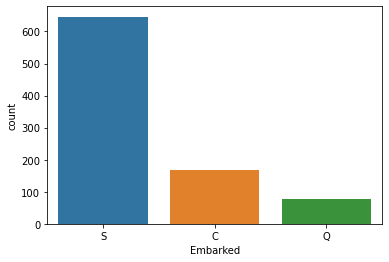

In [46]:
sns.countplot(df['Embarked'])

In [47]:
import re

# Extract the prefixes from ticket numbers
ticket_prefixes = df['Ticket'].apply(lambda x: re.sub(r'[0-9]', '', x)).unique()
print(ticket_prefixes)


['A/ ' 'PC ' 'STON/O. ' '' 'PP ' 'A/. ' 'C.A. ' 'A./. ' 'SC/Paris '
 'S.C./A.. ' 'CA ' 'S.P. ' 'S.O.C. ' 'SO/C ' 'W./C. ' 'SOTON/OQ '
 'W.E.P. ' 'STON/O . ' 'A. ' 'C ' 'SOTON/O.Q. ' 'SC/PARIS ' 'S.O.P. '
 'A.. ' 'Fa ' 'CA. ' 'LINE' 'F.C.C. ' 'W/C ' 'SW/PP ' 'SCO/W ' 'P/PP '
 'SC ' 'SC/AH ' 'A/S ' 'SC/AH Basle ' 'WE/P ' 'S.W./PP ' 'S.O./P.P. '
 'F.C. ' 'SOTON/O ' 'S.C./PARIS ' 'C.A./SOTON ']


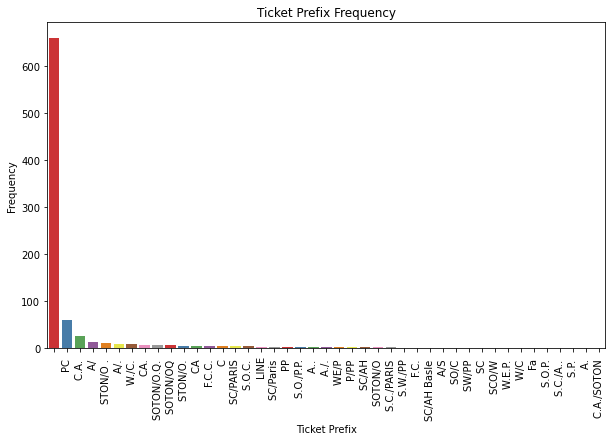

In [48]:
ticket_prefix_counts = df['Ticket'].apply(lambda x: re.sub(r'[0-9]', '', x)).value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=ticket_prefix_counts.index, y=ticket_prefix_counts.values, palette='Set1')
plt.title('Ticket Prefix Frequency')
plt.xlabel('Ticket Prefix')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


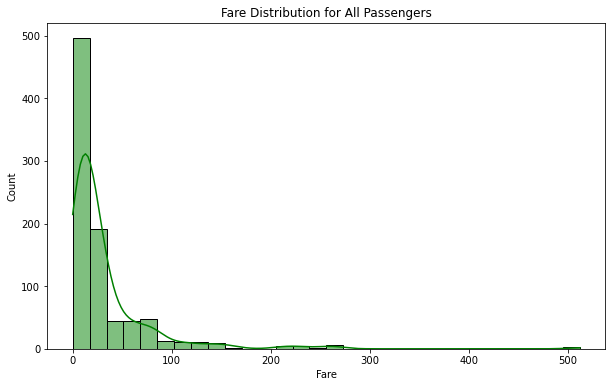

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Fare', bins=30, kde=True, color='green')
plt.title('Fare Distribution for All Passengers')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()


In [50]:
fare_stats = df['Fare'].describe()
fare_stats

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

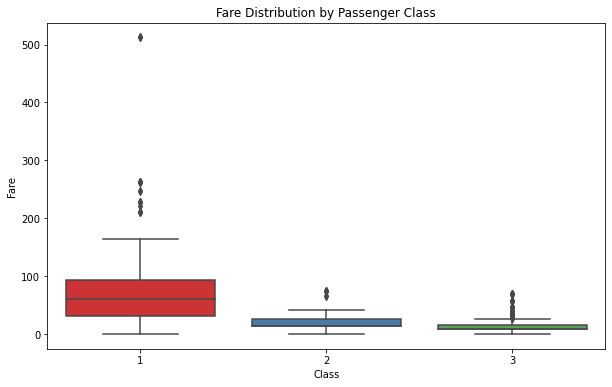

In [51]:
# Create boxplots to visualize fare distributions for different passenger classes
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Pclass', y='Fare', palette='Set1')
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Class')
plt.ylabel('Fare')
plt.show()

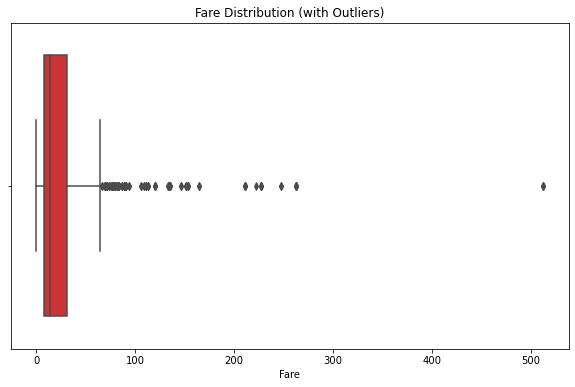

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Fare', palette='Set1')
plt.title('Fare Distribution (with Outliers)')
plt.xlabel('Fare')
plt.show()

In [53]:

# Calculate the IQR (Interquartile Range)
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the 'fare' column
titanic_no_outliers = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]
titanic_no_outliers

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Mr
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Mr
5,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,Rev
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,Mr


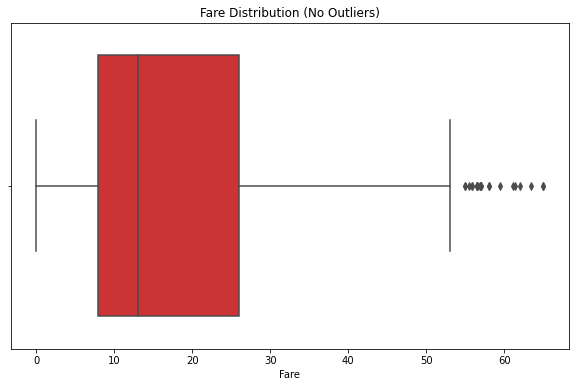

In [54]:
# Create a boxplot to visualize the fare distribution (without outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(data=titanic_no_outliers, x='Fare', palette='Set1')
plt.title('Fare Distribution (No Outliers)')
plt.xlabel('Fare')
plt.show()

C:\Users\preet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

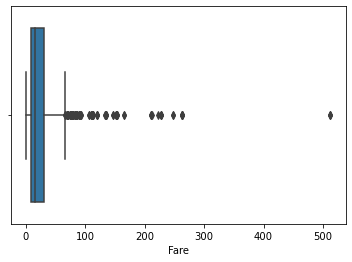

In [55]:
sns.boxplot(df['Fare'])

C:\Users\preet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

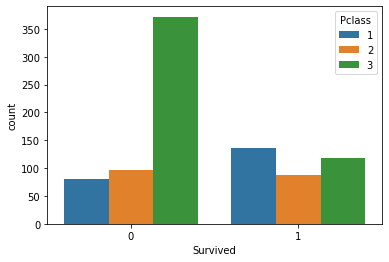

In [56]:
# Multivariate Analysis
# Survival and PClass
sns.countplot(df['Survived'], hue=df['Pclass'])

In [57]:
pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


C:\Users\preet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

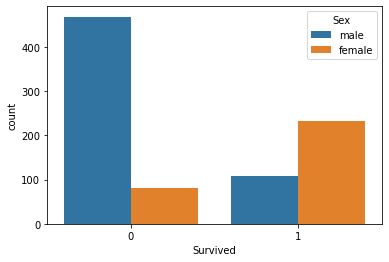

In [58]:
sns.countplot(df['Survived'], hue=df['Sex'])

In [59]:
pd.crosstab(df['Sex'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


C:\Users\preet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

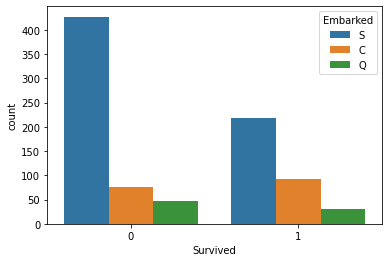

In [60]:
sns.countplot(df['Survived'],hue=df['Embarked'])

In [61]:
pd.crosstab(df['Embarked'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


C:\Users\preet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\preet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

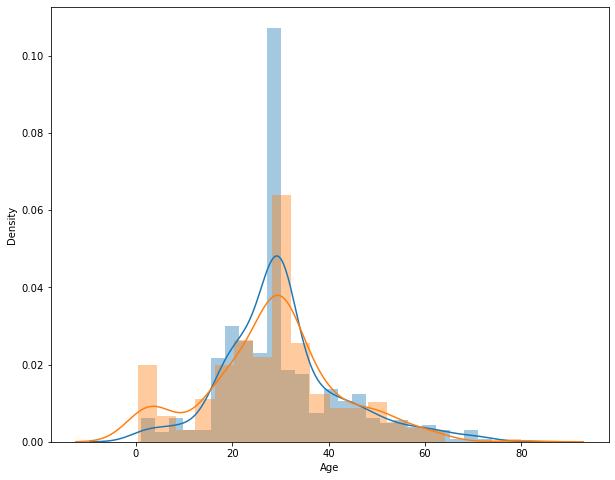

In [62]:
plt.figure(figsize=(10,8))
sns.distplot(df[df['Survived']==0]['Age'])
sns.distplot(df[df['Survived']==1]['Age'])

C:\Users\preet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\preet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

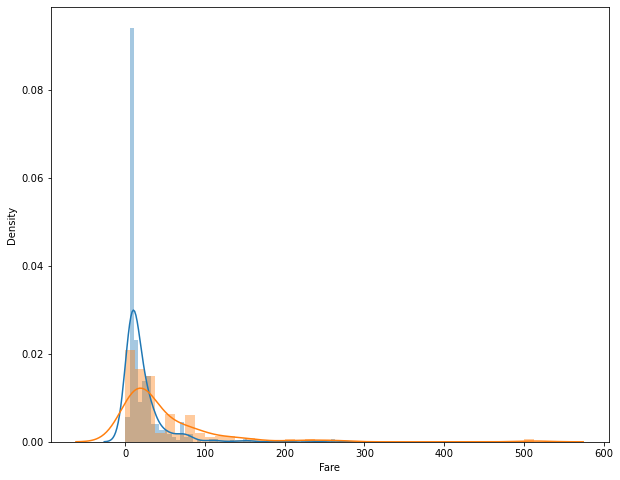

In [63]:
plt.figure(figsize=(10,8))
sns.distplot(df[df['Survived']==0]['Fare'])
sns.distplot(df[df['Survived']==1]['Fare'])

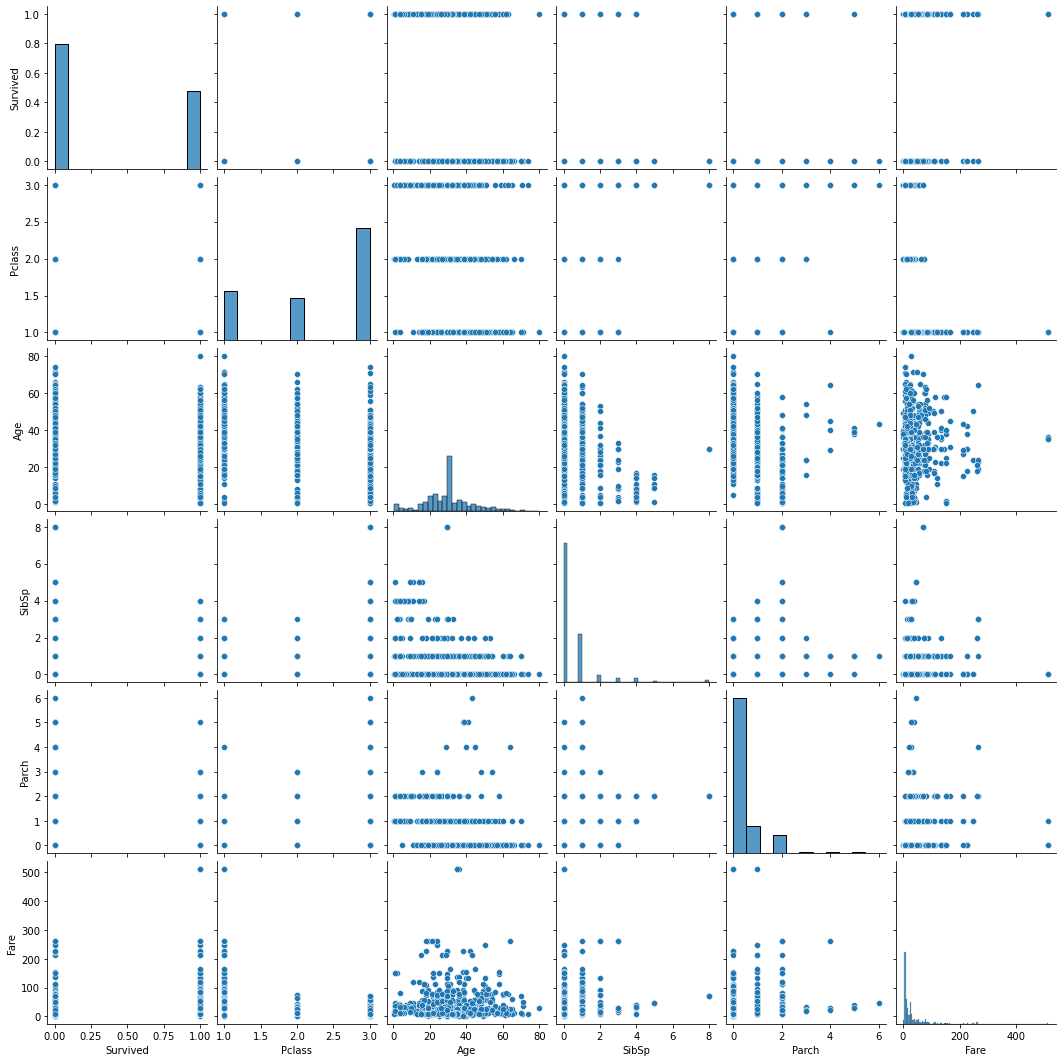

In [64]:
sns.pairplot(df)

<AxesSubplot:>

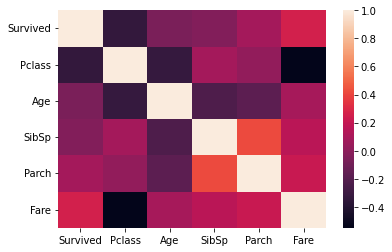

In [65]:
sns.heatmap(df.corr())

## Data Preprocessing

In [67]:
df = pd.get_dummies(df, columns=['Sex'], prefix=['sex'], drop_first=True)
df

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,sex_male
0,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,S,Mr,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C,Mrs,0
2,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,S,Mrs,0
4,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,S,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,S,Rev,1
887,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,S,Miss,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,S,Miss,0
889,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C,Mr,1


In [68]:
df = pd.get_dummies(df, columns=['Embarked'], prefix=['embarked'], drop_first=True)
df

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Title,sex_male,embarked_Q,embarked_S
0,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,Mr,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,Mrs,0,0,0
2,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,Miss,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,Mrs,0,0,1
4,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,Mr,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,Rev,1,0,1
887,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,Miss,0,0,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,Miss,0,0,1
889,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,Mr,1,0,0


In [69]:
df

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Title,sex_male,embarked_Q,embarked_S
0,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,Mr,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,Mrs,0,0,0
2,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,Miss,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,Mrs,0,0,1
4,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,Mr,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,Rev,1,0,1
887,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,Miss,0,0,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,Miss,0,0,1
889,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,Mr,1,0,0


In [71]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df = df.drop(columns=['Name'])


In [72]:
df = df.drop(columns=['Ticket'])

In [73]:
df = df.drop(columns=['Title'])

In [75]:
from sklearn.model_selection import train_test_split

# Assume 'titanic' is your dataset containing features and target variable

# Define the features (X) and target variable (y)
X = df.drop(columns=['Survived'])  # Features (all columns except 'survived')
y = df['Survived']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The 'test_size' parameter specifies the proportion of the dataset to include in the test split.
# 'random_state' ensures reproducibility by setting a fixed random seed.

# Now, you have the following sets:
# X_train: Features for training
# X_test: Features for testing
# y_train: Target variable for training
# y_test: Target variable for testing


In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to train and evaluate a model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Example usage for Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
accuracy, precision, recall, f1 = train_and_evaluate_model(lr_model, X_train, y_train, X_test, y_test)


C:\Users\preet\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define hyperparameter grid for a model (e.g., Decision Trees)
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best hyperparameters to train your model
best_model = DecisionTreeClassifier(**best_params)
best_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=10)

In [78]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming 'model' is your trained classification model
y_pred = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Classification report with additional metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[95 10]
 [26 48]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.65      0.73        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.78       179
weighted avg       0.80      0.80      0.79       179



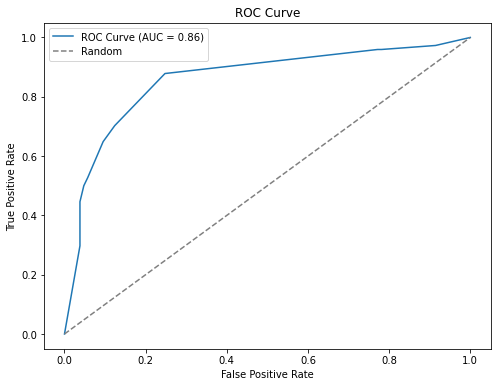

In [79]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC score
y_probs = best_model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


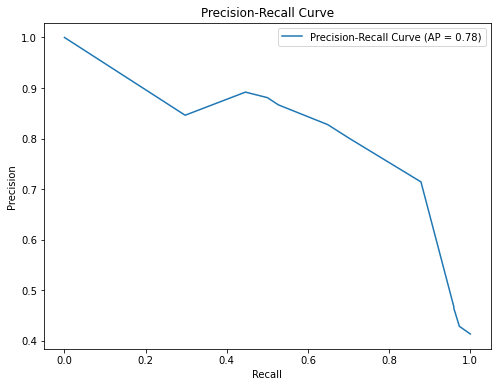

In [80]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate precision-recall curve and average precision score
precision, recall, _ = precision_recall_curve(y_test, y_probs)
average_precision = average_precision_score(y_test, y_probs)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve (AP = {:.2f})'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [ ]:
# Assuming 'model' is your trained model
if hasattr(best_model, 'feature_importances_'):
    feature_importance = best_model.feature_importances_
    feature_names = X_train.columns

    # Create a DataFrame to display feature importances
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
    plt.title('Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
